In [3]:
#Importar as bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [7]:
#Carrega o dataset a ser utilizado
#path = kagglehub.dataset_download("/heartcsv")
#pd.DataFrame(/sample_data/)
#print("Path to dataset files:", path)
#url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/heart/heart.csv'
df = pd.read_csv("/content/heart.csv")
print('Visualização inicial do dataset:')
display(df.head())

Visualização inicial do dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Verificação inicial e pré-processamento para a questão
print('Informações gerais:')
df.info()
print('Valores ausentes por coluna:')
print(df.isnull().sum())
df = df.dropna()
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Valores ausentes por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
th

In [9]:
#Divisão entre os grupos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
#Para podermos utilizar o algoritmo RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [11]:
#Para utilizarmos o algoritmo SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]

In [14]:
#Criamos uma funçãi para retornar o modelo mais promissor
def avaliar_modelo(nome, y_test, y_pred, y_prob):
    print(f'{nome}')
    print(classification_report(y_test, y_pred))
    print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}')

avaliar_modelo('Random Forest', y_test, y_pred_rf, y_prob_rf)
avaliar_modelo('SVM', y_test, y_pred_svm, y_prob_svm)

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

Acurácia: 0.79
ROC-AUC: 0.87
SVM
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

Acurácia: 0.79
ROC-AUC: 0.85


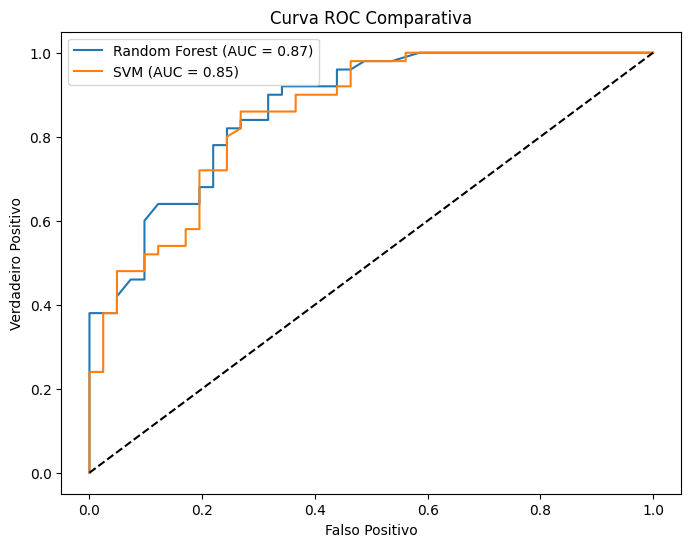

In [15]:
# Curva ROC para facilitar a comparação de forma visual, quanto mais a esquerda superior, melhor é
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.show()

In [ ]:
#As variáveis mais importante

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Importância das variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()